# Grundgerüst Leistungsausweis
Dieses Notebook soll euch als Grundgerüst für euren Leistungsnachweis dienen. Es soll euch eine Idee/ Hilfestellung bieten, wie man einen neuen Datensatz, basierend auf einer Fragestellung, strukturiert analysieren und interpretieren kann. Wie besagt, dient das Notebook als Hilfestellung, ist jedoch keinenfalls vollständig ausgeschöpft. In diesem Sinne dürft ihr auch gerne Sachen miteinbeziehen, welche hier nicht genannt werden. 

-> Bitte schreibt die Antwort zu den jeweiligen Punkten an oberster Stelle unterhalb der Titel (so wie dies auch im Leistungsnachweisbeispiel gemacht wurde).


## Struktur
1. Fragestellung(en) und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

---

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- Veränderung der Müttersterblichkeitsrate
### 1.2 Fragestellung:
- Wir untersuchen, wie sich die Muttersterblichkeitsrate pro 100'000 Lebgeburten weltweit in verschiedenen Ländern von 2000 bis 2023 verändert hat. Und welche Ursachen tragen am stärksten zur Müttersterblicheit bei.   
### 1.3 Datenquelle(n):
- https://ourworldindata.org/maternal-mortality
### 1.4 Weitere Quellen:
- 




### 1.4 Daten beschaffen und laden

In [2]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# lade hier deine Daten
df = pd.read_csv('number-of-maternal-deaths-by-region.csv', skiprows=1,
                 names=['Land','Code','Jahr','Müttersterblichkeit', 'Annotation'])

df = df.drop(columns=['Annotation'])
 
df.head()

,Land,Code,Jahr,Müttersterblichkeit
0,Afghanistan,AFG,1985,13181.217
1,Afghanistan,AFG,1986,11068.511
2,Afghanistan,AFG,1987,10826.929
3,Afghanistan,AFG,1988,9364.836
4,Afghanistan,AFG,1989,9327.983


## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?

In [4]:
df_pivot = df.pivot(index='Land', columns='Jahr', values='Müttersterblichkeit')
df_pivot.head()

Jahr,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Land,,,,,,,,,,,,,,,,,,,,,
Afghanistan,13181.217000,11068.511000,10826.929000,9364.836000,9327.983000,9874.669000,9818.087000,9643.358000,10228.346000,11888.982000,...,9810.437000,9870.905000,9438.184000,8971.437500,8698.753000,8450.418000,9060.640000,9597.547000,8055.301300,7646.329600
Africa,231344.170000,231458.950000,242016.560000,236258.700000,234999.660000,236437.110000,235685.840000,242697.750000,241246.190000,235799.610000,...,225785.050000,223385.530000,217618.720000,211686.770000,203149.980000,197870.620000,191660.080000,199323.830000,183741.110000,181866.660000
Albania,30.430904,28.572790,27.413498,26.916271,26.358099,25.229862,23.202032,21.155695,18.773117,17.337833,...,3.686695,3.293230,2.915944,2.598465,2.326609,2.206411,2.128189,4.134013,2.330551,1.977849
Algeria,2449.367400,2178.134000,1940.598100,1785.949700,1664.787000,1531.345600,1517.179200,1506.790400,1499.519800,1494.267300,...,822.211550,821.023440,817.778600,806.451200,771.523200,740.652160,955.951800,755.089970,600.643000,566.103000
Andorra,0.115992,0.111881,0.111295,0.108967,0.131117,0.106446,0.123265,0.128556,0.125128,0.126537,...,0.064251,0.065421,0.059839,0.064180,0.057989,0.056932,0.256290,0.095306,0.090644,0.058978


## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

In [5]:
df.dtypes

Land                    object
Code                    object
Jahr                     int64
Müttersterblichkeit    float64
dtype: object

#### 3.1 Analyse der Länder 


In [6]:
unerwünscht = [
    'Africa', 'Asia', 'Europe', 'World',
    'High-income countries', 
    'Low-income countries',
    'Lower-middle-income countries',
    'Upper-middle-income countries'
]

df = df[~df['Land'].isin(unerwünscht)]


In [7]:
print('Anzahl der verschienenen Länder: ', len(df['Land'].unique()))

Anzahl der verschienenen Länder:  198


In [10]:
df['Land'].value_counts().sort_values(ascending=True)

Land
Kiribati       38
Afghanistan    39
Algeria        39
Albania        39
Angola         39
               ..
Vanuatu        39
Zambia         39
Venezuela      39
Yemen          39
Zimbabwe       39
Name: count, Length: 198, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Land'}, xlabel='Land', ylabel='Anzahl Datenpunkte'>

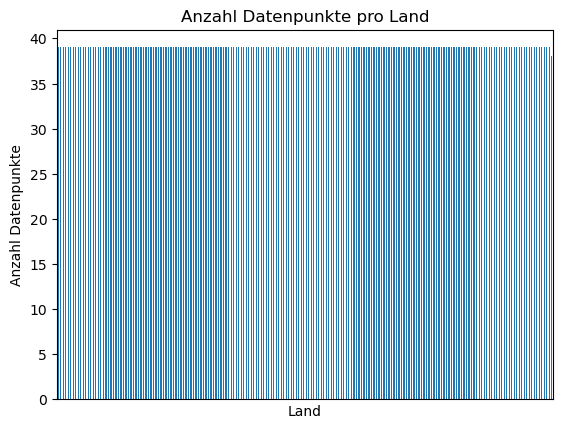

In [ ]:
# Oben schon sortiert, deshalb sieht man, dass genau 1 nicht 39 ist
df['Land'].value_counts().plot(kind='bar',
                               xticks=[],
                               ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Land')

#### 3.2 Analyse Codes

In [10]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  196


In [11]:
df['Code'].value_counts().sort_values(ascending=True)

Code
KIR    38
AFG    39
DZA    39
ALB    39
AGO    39
       ..
VEN    39
SVN    39
ZMB    39
YEM    39
ZWE    39
Name: count, Length: 195, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Code'}, xlabel='Code', ylabel='Anzahl Datenpunkte'>

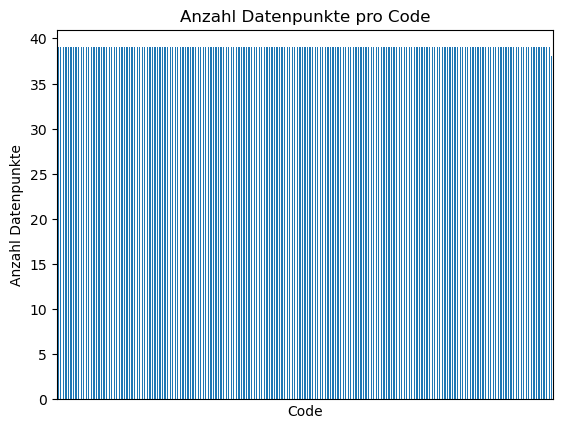

In [ ]:
# Oben schon sortiert, deshalb sieht man, dass genau 1 nicht 39 ist
df['Code'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code')

#### 3.3 Analyse der Jahre

In [13]:
print('Anzahl verschiedener Jahre: ', len(df['Jahr'].unique()))

Anzahl verschiedener Jahre:  39


In [14]:
df['Jahr'].value_counts().sort_index()

Jahr
1985    197
1986    198
1987    198
1988    198
1989    198
1990    198
1991    198
1992    198
1993    198
1994    198
1995    198
1996    198
1997    198
1998    198
1999    198
2000    198
2001    198
2002    198
2003    198
2004    198
2005    198
2006    198
2007    198
2008    198
2009    198
2010    198
2011    198
2012    198
2013    198
2014    198
2015    198
2016    198
2017    198
2018    198
2019    198
2020    198
2021    198
2022    198
2023    198
Name: count, dtype: int64

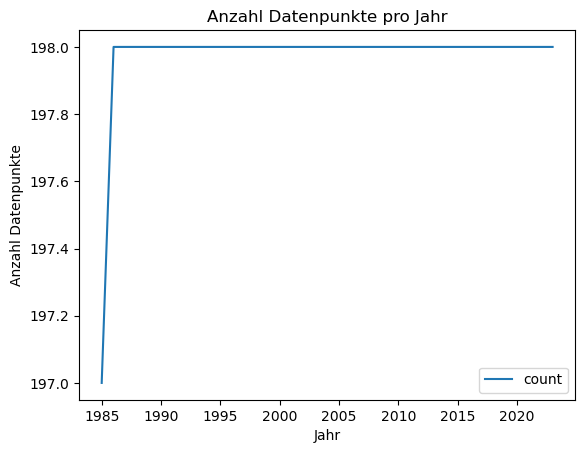

In [15]:
g = df['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.legend()

#### 3.4 Analyse der Müttersterblichkeit

In [16]:
df.describe()

,Jahr,Müttersterblichkeit
count,7721.000000,7721.000000
mean,2004.002461,2162.434828
std,11.254009,9145.613178
min,1985.000000,0.000191
25%,1994.000000,6.733131
50%,2004.000000,82.628170
75%,2014.000000,1056.831000
max,2023.000000,179946.480000


<bound method Axes.legend of <Axes: title={'center': 'Histogramm der Müttersterblichkeit'}, xlabel='Müttersterblichkeit', ylabel='Anzahl Datenpunkte'>>

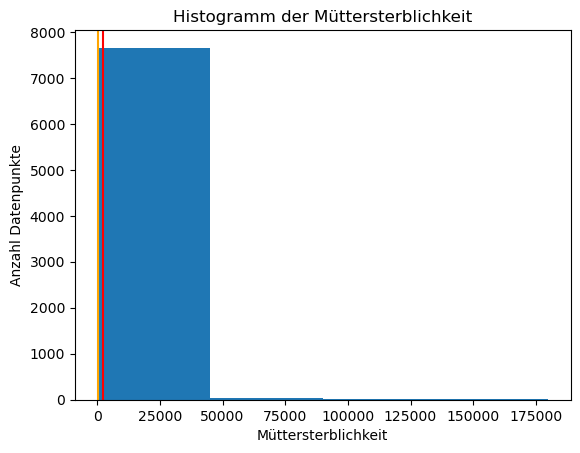

In [20]:
g = df['Müttersterblichkeit'].plot(kind='hist', bins=4, title='Histogramm der Müttersterblichkeit',
                                   xlabel='Müttersterblichkeit', ylabel='Anzahl Datenpunkte')
mean = df['Müttersterblichkeit'].mean()
g.axvline(x=df['Müttersterblichkeit'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')

median = df['Müttersterblichkeit'].median()
g.axvline(x=df['Müttersterblichkeit'].median(), color='orange',label= f'Median = {median:.2f}')

g.legend

## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).

